# Trabajo Integrador - Bootcamp Data Science

**Estudiante**: Orlando Velásquez

El trabajo integrador consiste en desarrollar un proceso de Ciencia de Datos sobre un escenario relacionado con los pagos de una entidad financiera.

## Análisis Exploratorio

Esta sección contiene el análisis exploratorio de los datos.

Se definen las columnas con sus tipos de datos y luego un análisis de cada característica.

Importamos las dependencias del proyecto con las que vamos a trabajar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
## TODO: Agregar los otros recursos que utilizaremos

In [2]:
df = pd.read_csv("data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Realizamos el análisis exploratorio por cada variable para conocer sus valores, y distribuciones

In [4]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: >

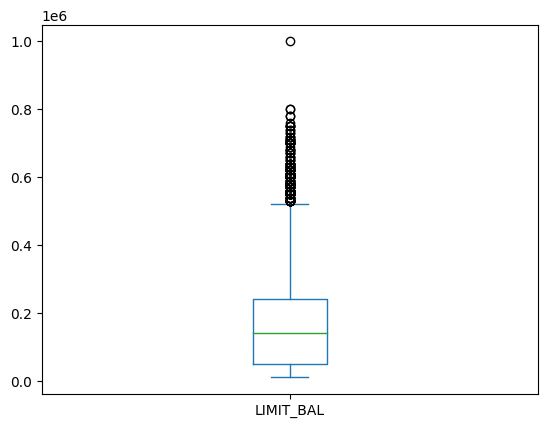

In [5]:
##Grafico CAJA BIGOTE
df['LIMIT_BAL'].plot(kind="box")

C:\Users\ovcor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


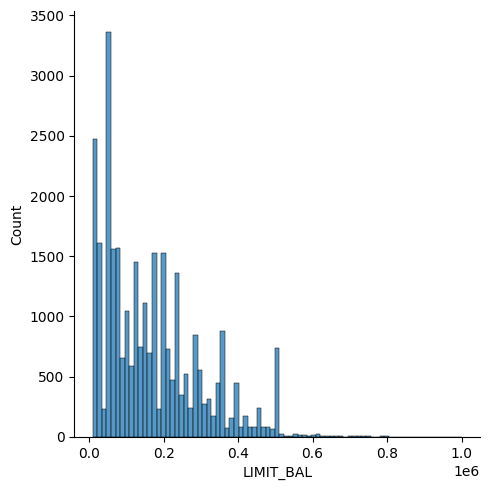

In [6]:
sns.displot(data=df, x='LIMIT_BAL')

C:\Users\ovcor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


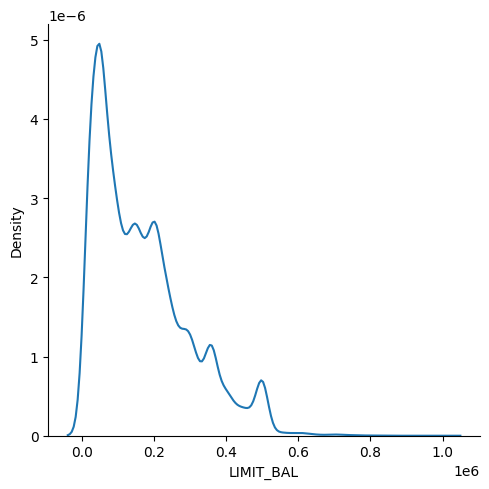

In [7]:
sns.displot(data=df, x='LIMIT_BAL', kind="kde")

A partir del analisis de la distribución de la variable LIMIT_BAL, se evidencia una concentración del conjunto de datos en el intervalo [0,600000] aproximadamente.
Los valores superiores a 600000 podrían ser considerados como **atípicos**

In [8]:
df['SEX'].describe()

count    30000.000000
mean         1.603733
std          0.489129
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: SEX, dtype: float64

In [9]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

<Axes: xlabel='SEX'>

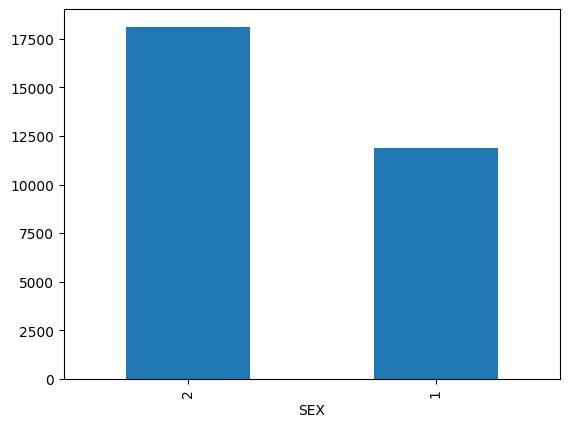

In [10]:
df['SEX'].value_counts().plot(kind="bar")

Al ser una variable de solo dos valores, se revisa qué valor pesa más. En este caso, el valor 2. 

In [11]:
df['EDUCATION'].describe()

count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

In [12]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: >

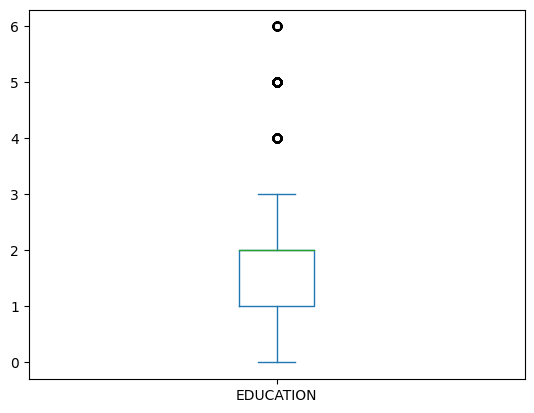

In [13]:
##Grafico CAJA BIGOTE
df['EDUCATION'].plot(kind="box")

<Axes: xlabel='EDUCATION'>

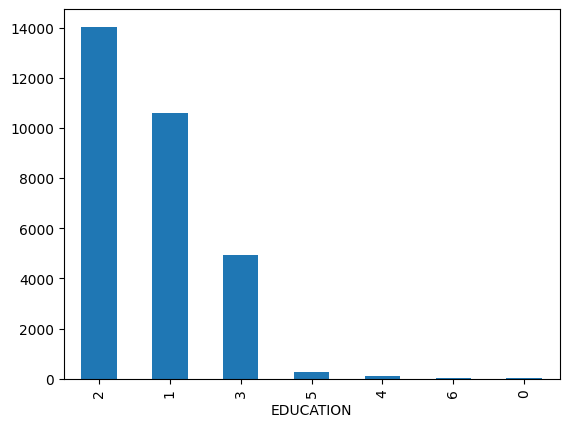

In [14]:
df['EDUCATION'].value_counts().plot(kind="bar")

Se puede extraer de los gráficos que la mayor concentración está en el intervalo [1,3], y que los valores sobre 3 son marginales.

In [15]:
df['MARRIAGE'].describe()

count    30000.000000
mean         1.551867
std          0.521970
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [16]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE'>

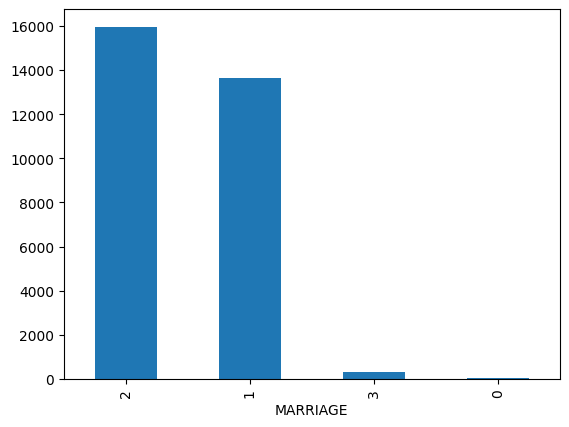

In [17]:
df['MARRIAGE'].value_counts().plot(kind="bar")

Al ser dos valores predominantes según el conteo, se puede extraer que los valores distintos de 1 y 2 son marginales, y que ambos tienen un peso similar.

In [18]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

C:\Users\ovcor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


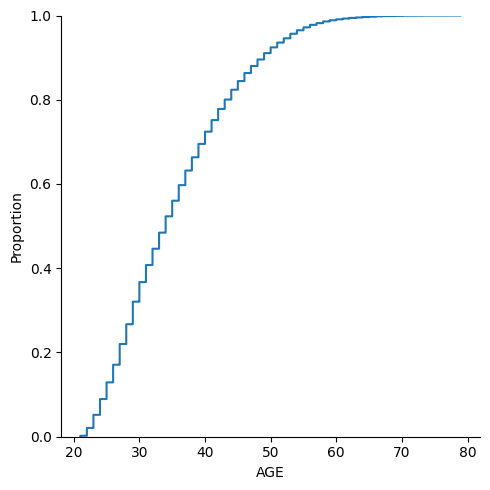

In [19]:
sns.displot(data=df, x="AGE", kind = "ecdf")

<Axes: xlabel='AGE'>

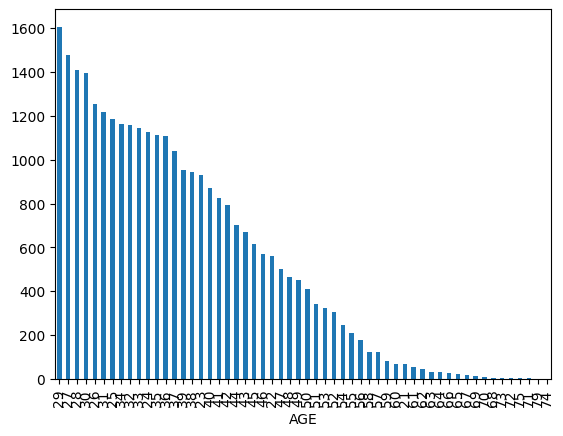

In [20]:
df['AGE'].value_counts().plot(kind="bar")

<Axes: >

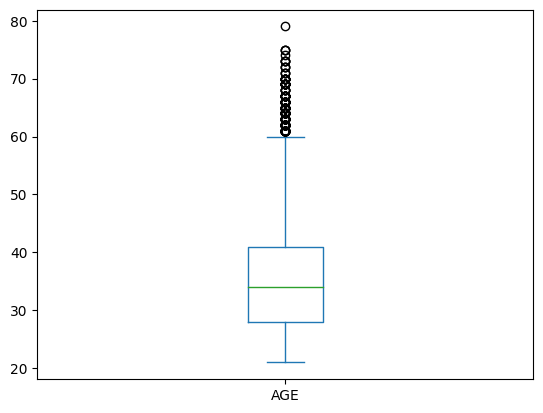

In [21]:
df["AGE"].plot(kind="box")

La variable AGE varía en el intervalo [20,60], considerando los valores mayores a 60 son marginales.

In [22]:
df['PAY_0'].describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_0, dtype: float64

In [23]:
df['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

C:\Users\ovcor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


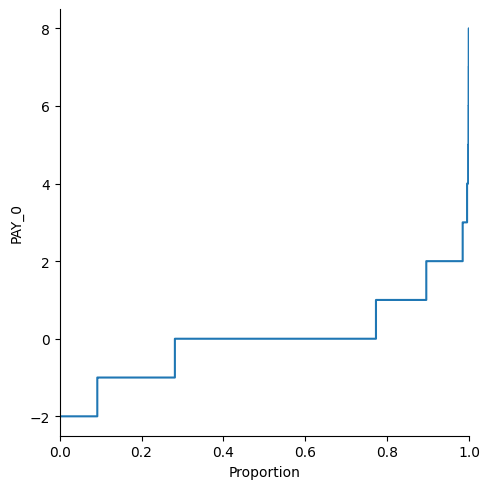

In [24]:
sns.displot(data=df, y='PAY_0', kind="ecdf")

<Axes: >

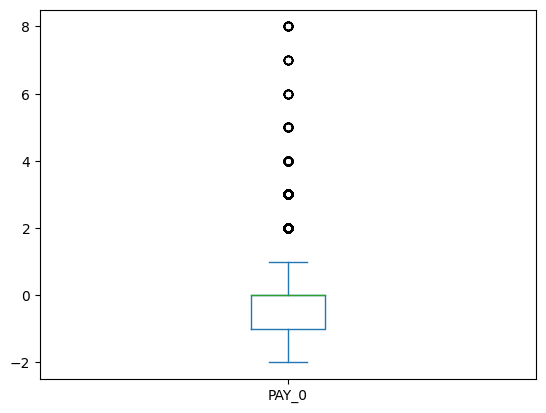

In [25]:
df["PAY_0"].plot(kind="box")

Esta variable muestra mayor distribución en el valor 0, con una notoria mayor proporción.